### Investigate the influence of neural network structure

goals:
- refer to typical neural network, and find the best networkstructure

investigated structure (we build the list as we go)

- residual block

In [2]:
import numpy as np
from plot import plot_result_csv, plot_result_event

### Residual block structure
Three typical residual block structures have been investigated, named as *resblock_1*, *resblock_2*, *resblock_3*. Note that these experiments are conducted in pretrain model, the supervised machine learning problem.

*resblock_1* has the structure as follows. 

<center>
<img src="./Images/Network_analysis_resblock_1.png" width = "20%" height = "20%" alt="Initial"/>
</center>

According to the  $Ref^{[1]}$, it would be better if we put BN layer and ReLu layer before Conv layer, which is *resblock_2* as shown in the next figure.

<center>
<img src="./Images/Network_analysis_resblock_1&2.png" width = "30%" height = "30%" alt="Initial"/>
</center>

And in order to enhance the adaptability of the residual block, we make it work when the number of input channels differs with that of output channels based on $Ref^{[2]}$. Here is the structure of *resblock_3*.

<center>
<img src="./Images/Network_analysis_resblock_2&3.png" width = "40%" height = "40%" alt="Initial"/>
</center>

$Ref^{[1]}$: He K, Zhang X, Ren S, et al. Deep residual learning for image recognition[C]//Proceedings of the IEEE conference on computer vision and pattern recognition. 2016: 770-778.

$Ref^{[2]}$: He K, Zhang X, Ren S, et al. Identity mappings in deep residual networks[C]//European conference on computer vision. Springer, Cham, 2016: 630-645.


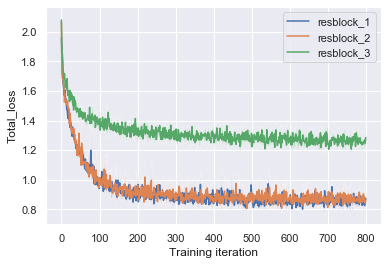

In [3]:
folders = ['resblock_1', 'resblock_2', 'resblock_3']
filenames = ['Total_loss']
files = [[['Tensorboard_data/{}/1/{}.csv'.format(folder, filename),
         'Tensorboard_data/{}/2/{}.csv'.format(folder, filename),
         'Tensorboard_data/{}/3/{}.csv'.format(folder, filename),]
        for filename in filenames] for folder in folders]

plot_result_csv(folders, filenames, files, max_length = 800, ifsave = False)

### Analysis
$Ref^{[2]}$ said that *resblock_3* should have the same accuracy of *resblock_1* because they have the same number of the parameters. But it did recommend *resblock_1* if the depth of the network is lower than 50, which is exactly our case. So we should not use *resblock_3*.

*resblock_1* and *resblock_2* have the same accuracy in our case. However, training time for *resblock_2* is much lower than that for *resblock_2*. So we should use *resblock_2*.

|resblock|experiment|time|
|:--:|:--:|:--:|
|resblock_1|1|1h2m32s|
|resblock_1|2|1h1m59s|
|resblock_1|3|1h1m19s|
|resblock_2|1|37m42s|
|resblock_2|2|37m37s|
|resblock_2|3|37m22s|


### number of channels

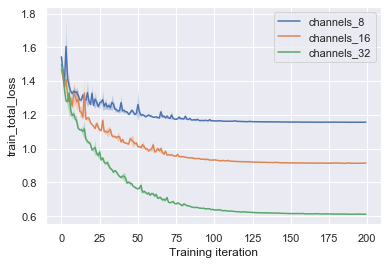

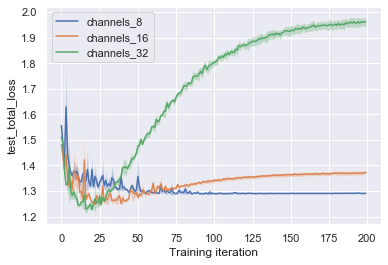

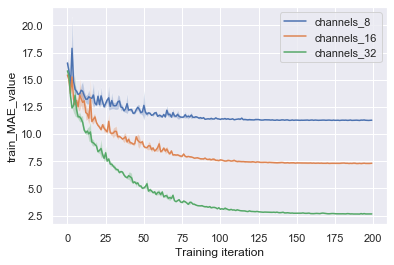

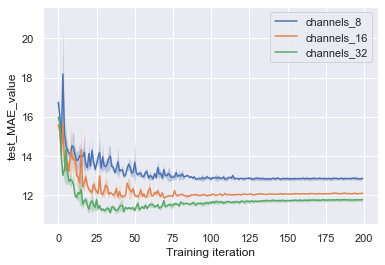

In [4]:
folders = ['channels_8', 'channels_16', 'channels_32']
filenames = ['train_total_loss', 'test_total_loss', 'train_MAE_value', 'test_MAE_value']
files = [[['Tensorboard_data/{}/1/{}.csv'.format(folder, filename),
         'Tensorboard_data/{}/2/{}.csv'.format(folder, filename),
         'Tensorboard_data/{}/3/{}.csv'.format(folder, filename),]
        for filename in filenames] for folder in folders]
plot_result_csv(folders, filenames, files, max_length = 200, ifsave = False)

### early stop & small batches & dropout

$Ref^{[1]}$: Keskar N S, Mudigere D, Nocedal J, et al. On large-batch training for deep learning: Generalization gap and sharp minima[J]. arXiv preprint arXiv:1609.04836, 2016.  
$Ref^{[2]}$: Masters D, Luschi C. Revisiting small batch training for deep neural networks[J]. arXiv preprint arXiv:1804.07612, 2018.